Part 1: Decision tree

Your initial goal is to construct a small yet useful decision tree that predicts whether a website is a phishing site or not.

The outcome should contain the following:

An image of the final decision tree.
Evaluation metrics for the decision tree.
Written instructions for an internet analyst to manually make the decision of whether the website is likely to be a phishing site or not. The instructions must match one-to-one with your decision tree, and be written in a way that is understandable to an engineer who is aware of the basics of internet technologies.

In [16]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


from ucimlrepo import fetch_ucirepo

df = pd.read_csv('phishing_websites.csv')

df.loc[:]

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


ESIMALLINNUS

In [17]:
x = df.drop('result', axis=1)
y = df['result']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(7738, 30) (3317, 30) (7738,) (3317,)


In [18]:
model = DecisionTreeClassifier(max_depth=2, random_state=20)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=20)

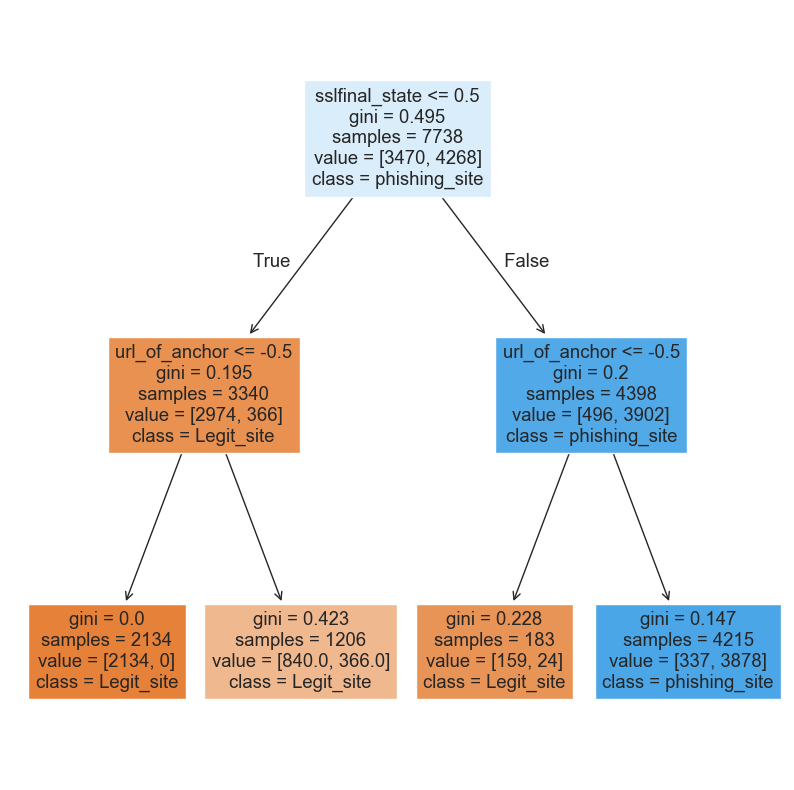

In [19]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 10))
plot_tree(model, feature_names=x.columns, class_names=['Legit_site', 'phishing_site'], filled=True)
plt.show()

Confusion matrix

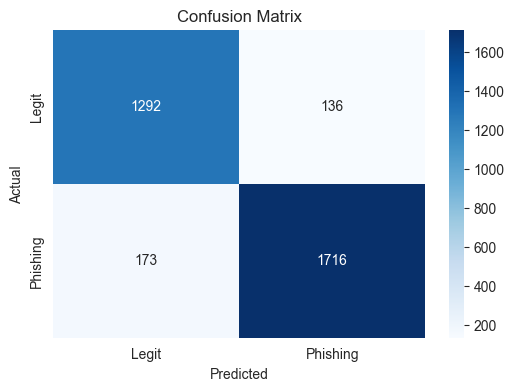

In [20]:
from sklearn.metrics import confusion_matrix

preds = model.predict(x_test)
cm = confusion_matrix(y_test, preds, labels=[-1, 1])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()